In [2]:

# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

ModuleNotFoundError: No module named 'tensorflow'

In [23]:
import matplotlib.pyplot as plt

In [64]:
import numpy as np
X = np.random.rand(100,5)
y = 5.*X[:,0] - 1. * X[:,1] - 0.5*X[:,2] - 4.*X[:,4] + 0.1*np.random.normal(size=100) # X[:,3] irrelevant



In [65]:
print(X[1,:])
print(y[1])

[0.76021499 0.21920234 0.65010611 0.19466757 0.57580883]
1.0060665340696962


In [66]:
import sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,y)

In [67]:
print(reg.coef_)  # Seems alright!

[ 5.03334427 -1.04851283 -0.51884616 -0.03196574 -4.03251539]


## Let's try to code SHAP for ourselves

In [101]:
p = 5 # Number of Features
n = 100 # Sample size
i = 10 # We want to analyze the ith instance 
j = 0 #  we want to study the jth Feature's importance on x_i
M = 100000 # number of iterations

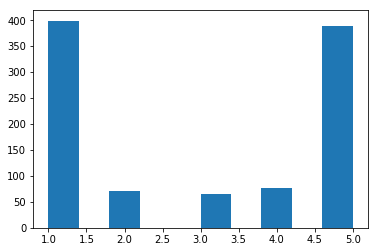

In [37]:
sample = np.random.beta(0.2, 0.2,1000)
sample = sample*5+1
sample = np.floor(sample).astype(int)
plt.hist(sample)
plt.show()

In [50]:
sel = np.random.choice(np.arange(p), size=3, replace=False)
print(sel)
r = np.arange(5)
print(r[sel])
r[sel] = 5
print(r)


[2 0 3]
[2 0 3]
[5 1 5 5 4]


In [53]:
print(sel)
np.sum(sel==1)

[2 0 3]


0

In [130]:
def ChooseK(P):# P is integer of Feature number
    K =np.random.beta(0.2, 0.2,1)
    K = int(P*K+1)
    if K==P+1: # some degenerate cases
        K = K-1
    return(K)

In [131]:
ChooseK(4)

2

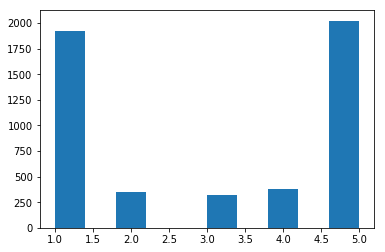

1.0 5.0
[5. 1. 1. ... 1. 1. 1.]


In [133]:
ks = np.empty(5000)
for ll in range(5000):
    ks[ll] =ChooseK(5)
plt.hist(ks)
plt.show()
print(min(ks),max(ks))
print(ks)

In [68]:
def SwapFeatures(i,m,j,k):
    # take instance x_i, exchange k of its features randomly with the features of x_m including the jth Feature
    output = X[i,:].copy()
    
    if k == 1: # only change jth Feature
        output[j] = X[m,j].copy()
    
    else:
        Selection = np.random.choice(np.arange(p), size=k, replace=False)
        while (np.sum(Selection==j) ==0): # Make sure that j is included in selection
            Selection = np.random.choice(np.arange(p), size=k, replace=False)
        
        output[Selection] = X[m,Selection].copy()
    
    return(output)
        
        

In [70]:
print(X[np.arange(4),:])
print(SwapFeatures(2,3,0,2))

[[0.90933378 0.16643258 0.20866642 0.90873685 0.0910367 ]
 [0.76021499 0.21920234 0.65010611 0.19466757 0.57580883]
 [0.98230741 0.5899694  0.84660275 0.28821197 0.38599373]
 [0.55651195 0.49289882 0.03680454 0.86269364 0.36388063]]
[0.55651195 0.5899694  0.84660275 0.28821197 0.36388063]


In [74]:
def Compare(x_j, x_noj, Model):
    return(Model.predict(x_j.reshape(1, -1)) - Model.predict(x_noj.reshape(1, -1)))

In [73]:
reg.predict(np.arange(5).reshape(1, -1))

array([-18.25248954])

In [162]:
j = 4
M = 10000

In [163]:
M_iter = 0 # iteration index
SHAPValues = np.empty(M)
while M_iter<M:
    m = np.random.randint(n) # random instance to "mix" x_i with
    
    if m != i:
        k = ChooseK(p)
        x_dummy_noj = SwapFeatures(i,m,j,k) # sample from random other instance
        x_dummy_j = x_dummy_noj.copy()
        x_dummy_j[j] = X[i,j].copy()  # compare with j and without j
        
        SHAPValues[M_iter] = Compare(x_dummy_j,x_dummy_noj, Model=reg)
        
        M_iter = M_iter+1

    


In [164]:
np.mean(SHAPValues)

1.5331431826791868

In [165]:
X[i,:]

array([0.02674323, 0.70809225, 0.26539912, 0.27852318, 0.13629331])

In [166]:
X[i,j]

0.13629331341065853

In [167]:
np.mean(SHAPValues)/(X[i,j]-np.mean(X[:,j])) 

-4.0514014680718144